In [63]:
import nfl_data_py as nfl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = nfl.import_pbp_data(range(2016,2024),downcast=True)

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [27]:
roster = nfl.import_seasonal_rosters(range(2016,2024),columns = ['position','player_id'])
roster = roster.rename(columns = {"player_id": "receiver_player_id"})
roster = roster.drop_duplicates()

In [4]:
df['route'].value_counts().sum()

141584

In [5]:
df['defense_coverage_type'].value_counts().sum()

108897

In [6]:
df1 = df[(df['route'].isnull()==False)&(df['defense_coverage_type'].isnull()==False)]

In [7]:
df1['route'].value_counts().sum()

104638

In [8]:
df1['defense_coverage_type'].value_counts().sum()

104638

In [41]:
df1 = pd.merge(df1,roster, how = 'inner', on = 'receiver_player_id')

In [42]:
len(df1)

106272

In [44]:
df1['defense_coverage_type'].value_counts().sum()

106272

In [45]:
df1 = df1[(df1['position']=='WR')|(df1['position']=='TE')|(df1['position']=='RB')]

In [46]:
df1['play1'] = 1

In [47]:
rec = df1.groupby(['receiver_player_name','receiver_player_id','position','route']).sum()[['epa','success','play1']].sort_values(by='epa',ascending=False)

/var/folders/px/4gxkv6mj4d7__r8zzpt1_w900000gp/T/ipykernel_54683/1557875672.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rec = df1.groupby(['receiver_player_name','receiver_player_id','position','route']).sum()[['epa','success','play1']].sort_values(by='epa',ascending=False)


In [48]:
rtpos = df1.groupby(['route','position']).sum()[['epa','success','play1']].sort_values(by='epa',ascending=False)

/var/folders/px/4gxkv6mj4d7__r8zzpt1_w900000gp/T/ipykernel_54683/1731974864.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rtpos = df1.groupby(['route','position']).sum()[['epa','success','play1']].sort_values(by='epa',ascending=False)


In [49]:
rtpos['avgSuccPerPos'] = rtpos['success']/rtpos['play1']
rtpos['avgEpaPerPos'] = rtpos['epa']/rtpos['play1']
rtpos

,,epa,success,play1,avgSuccPerPos,avgEpaPerPos
route,position,,,,,
GO,WR,2349.625244,2846.0,8297,0.343016,0.283190
HITCH,WR,2255.752686,7183.0,12362,0.581055,0.182475
CROSS,WR,2183.904053,4356.0,8424,0.517094,0.259248
POST,WR,2130.238281,2007.0,3967,0.505924,0.536990
OUT,WR,2094.916748,5325.0,9288,0.573320,0.225551
SLANT,WR,1456.391724,3339.0,5765,0.579185,0.252626
IN,WR,1376.088257,2888.0,5296,0.545317,0.259835
CROSS,TE,929.449158,1943.0,3633,0.534820,0.255835
CORNER,WR,904.178955,960.0,2178,0.440771,0.415142


In [50]:
rt = df1.groupby('route').sum()[['epa','success','play1']].sort_values(by='epa',ascending=False)
rt['avgSuccPer'] = rt['success']/rt['play1']
rt['avgEpaPer'] = rt['epa']/rt['play1']
rt

/var/folders/px/4gxkv6mj4d7__r8zzpt1_w900000gp/T/ipykernel_54683/3578609281.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rt = df1.groupby('route').sum()[['epa','success','play1']].sort_values(by='epa',ascending=False)


,epa,success,play1,avgSuccPer,avgEpaPer
route,,,,,
CROSS,3187.459473,6562.0,12611,0.520339,0.252752
GO,3010.760742,3699.0,10343,0.357633,0.291092
HITCH,2745.772949,9852.0,17021,0.578814,0.161317
OUT,2545.846680,8120.0,14812,0.548204,0.171877
POST,2522.986328,2573.0,5065,0.507996,0.498122
SLANT,1848.268799,4178.0,7149,0.584417,0.258535
IN,1648.467651,3646.0,6711,0.543287,0.245637
CORNER,1403.188721,1445.0,3142,0.459898,0.446591
FLAT,286.517426,6484.0,14550,0.445636,0.019692


In [51]:
rec['succPer'] = rec['success']/rec['play1']
rec['epapp'] = rec['epa']/rec['play1']

In [52]:
rec = rec.join(rtpos[['avgSuccPerPos','avgEpaPerPos']],how = 'left',on = ['route','position'])
rec = rec.join(rt[['avgSuccPer','avgEpaPer']],how = 'left',on = 'route')

In [53]:
rec

,,,,epa,success,play1,succPer,epapp,avgSuccPerPos,avgEpaPerPos,avgSuccPer,avgEpaPer
receiver_player_name,receiver_player_id,position,route,,,,,,,,,
T.Hill,00-0033040,WR,GO,139.924774,55.0,116,0.474138,1.206248,0.343016,0.283190,0.357633,0.291092
T.Kelce,00-0030506,TE,CROSS,95.406754,90.0,138,0.652174,0.691353,0.534820,0.255835,0.520339,0.252752
M.Evans,00-0031408,WR,GO,92.202545,67.0,166,0.403614,0.555437,0.343016,0.283190,0.357633,0.291092
T.Kelce,00-0030506,TE,OUT,92.193336,108.0,167,0.646707,0.552056,0.546680,0.156895,0.548204,0.171877
D.Adams,00-0031381,WR,OUT,87.526184,106.0,160,0.662500,0.547039,0.573320,0.225551,0.548204,0.171877
...,...,...,...,...,...,...,...,...,...,...,...,...
K.Ballage,00-0034799,RB,OUT,-23.520281,7.0,16,0.437500,-1.470018,0.456084,-0.010614,0.548204,0.171877
L.Fitzgerald,00-0022921,WR,GO,-24.994049,9.0,37,0.243243,-0.675515,0.343016,0.283190,0.357633,0.291092
A.Kamara,00-0033906,RB,SCREEN,-25.574488,37.0,121,0.305785,-0.211359,0.402850,-0.037146,0.420089,-0.048306


In [54]:
rec.sort_values(by='play1',ascending=False)

,,,,epa,success,play1,succPer,epapp,avgSuccPerPos,avgEpaPerPos,avgSuccPer,avgEpaPer
receiver_player_name,receiver_player_id,position,route,,,,,,,,,
S.Diggs,00-0031588,WR,HITCH,65.156654,146.0,228,0.640351,0.285775,0.581055,0.182475,0.578814,0.161317
T.Kelce,00-0030506,TE,HITCH,82.419044,149.0,227,0.656388,0.363079,0.580364,0.118888,0.578814,0.161317
A.Ekeler,00-0033699,RB,FLAT,11.203630,92.0,200,0.460000,0.056018,0.418841,-0.022585,0.445636,0.019692
K.Allen,00-0030279,WR,HITCH,30.124029,106.0,182,0.582418,0.165517,0.581055,0.182475,0.578814,0.161317
A.Cooper,00-0031544,WR,HITCH,45.586479,109.0,179,0.608939,0.254673,0.581055,0.182475,0.578814,0.161317
...,...,...,...,...,...,...,...,...,...,...,...,...
D.Gray,00-0037828,WR,POST,-0.588662,0.0,1,0.000000,-0.588662,0.505924,0.536990,0.507996,0.498122
R.Davis,00-0033530,WR,IN,-0.591266,0.0,1,0.000000,-0.591266,0.545317,0.259835,0.543287,0.245637
T.Black,00-0036491,WR,SLANT,-0.591730,0.0,1,0.000000,-0.591730,0.579185,0.252626,0.584417,0.258535


In [56]:
rec = rec[rec['play1'] > 10]

In [61]:
rec['epaExp'] = rec['avgEpaPerPos']*rec['play1']

/var/folders/px/4gxkv6mj4d7__r8zzpt1_w900000gp/T/ipykernel_54683/3168846728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['epaExp'] = rec['avgEpaPerPos']*rec['play1']


In [68]:
rec = rec.reset_index()

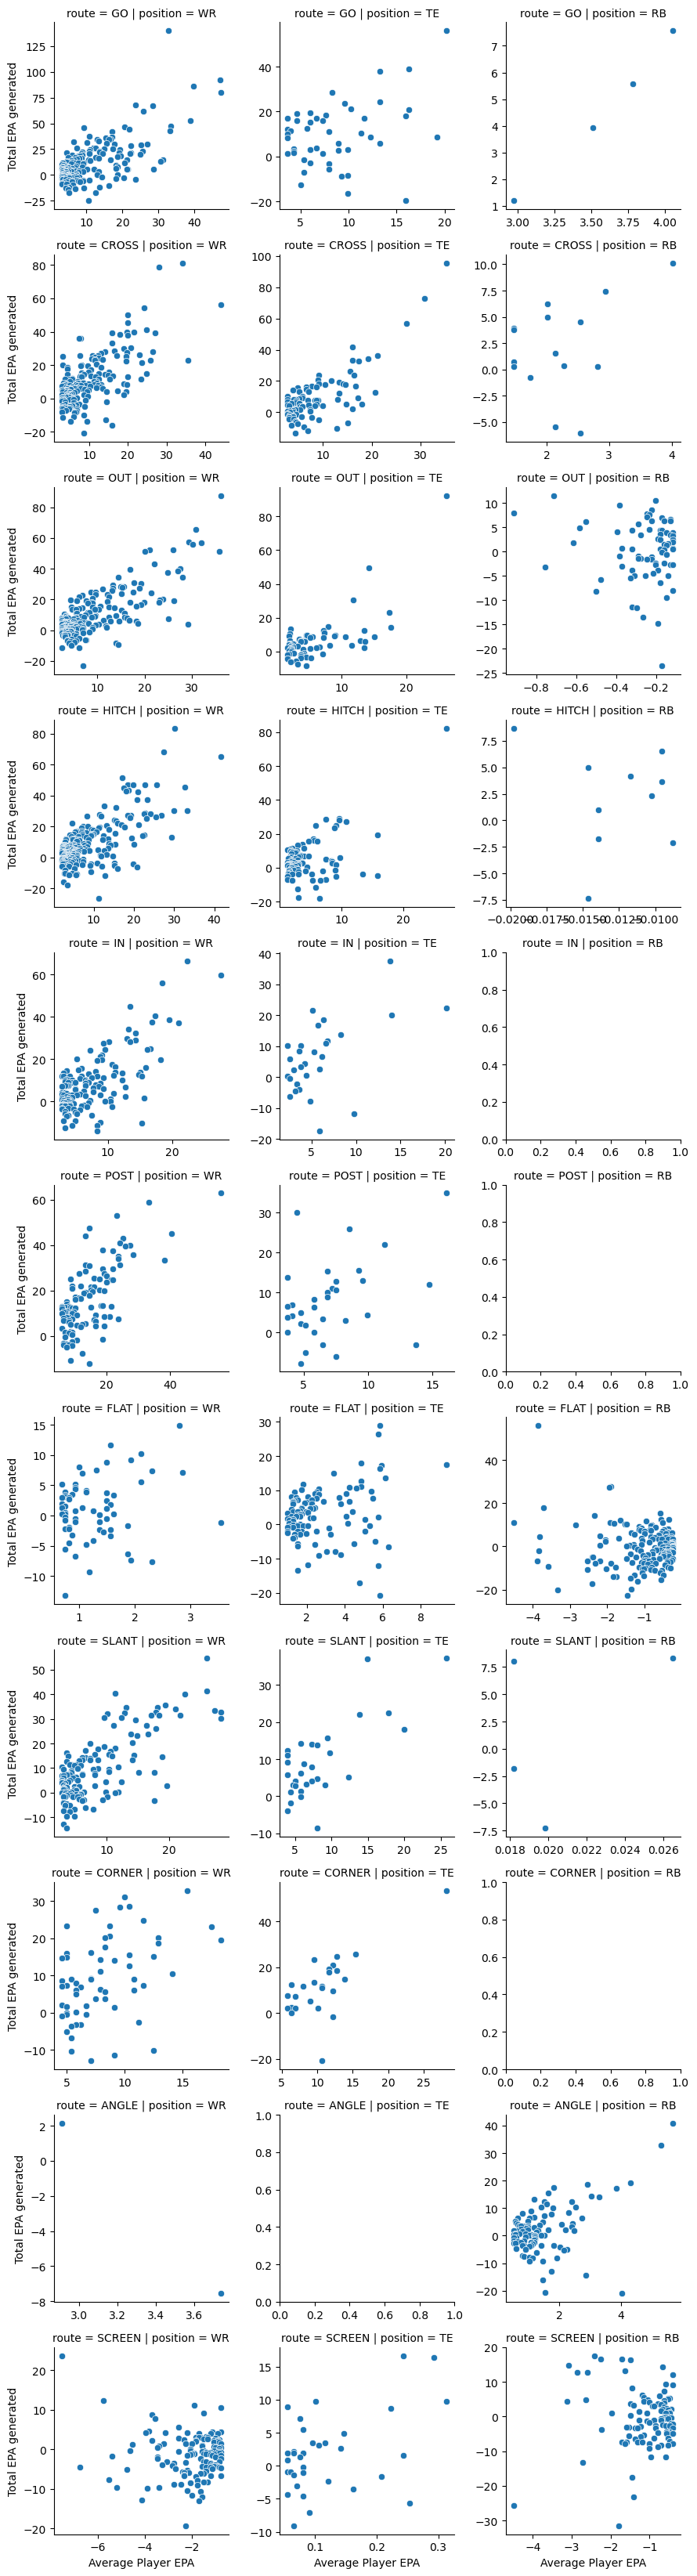

In [117]:
g = sns.FacetGrid(rec[rec['route'] != 'WHEEL'], col="position",  row="route", sharex=False,sharey = False)
g.map(sns.scatterplot, "epaExp", "epa")
g.set_axis_labels("Average Player EPA", "Total EPA generated")